# Linear Regression

$$
H(x) = W(x) + b
$$
$$
cost(W,b) = \frac{1}{m} \sum_{i=0}^{m} ( h( x^i ) - y^i )^2
$$

In [1]:
import sys
sys.version

'3.6.0 (default, Feb 26 2017, 20:43:59) \n[GCC 5.4.0 20160609]'

In [2]:
import tensorflow as tf
tf.__version__

'1.0.0'

In [3]:
import matplotlib.pyplot as plt

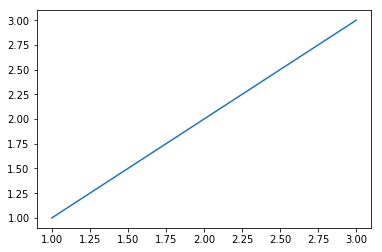

In [4]:
%matplotlib inline
x_data = [1, 2, 3]
y_data = [1, 2 ,3]

plt.plot(x_data,y_data)
plt.show()

$$
H(x) = W(x) + b
$$

In [5]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
h = W * x_data + b

print(tf.random_normal([1]))


Tensor("random_normal_2:0", shape=(1,), dtype=float32)


$$
cost(W,b) = \frac{1}{m} \sum_{i=0}^{m} ( h( x^i ) - y^i )^2
$$

In [6]:
print(h)
cost = tf.reduce_mean(tf.square(h - y_data))
#t = [1., 2., 3., 4.]
#tf.reduce_mean(t) ==> 2.5

Tensor("add:0", shape=(3,), dtype=float32)


In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
for step in range(2000):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(cost),sess.run(W), sess.run(b))

0 1.95845 [-0.06408868] [ 1.03109241]
20 0.221277 [ 0.42469585] [ 1.17565322]
40 0.186847 [ 0.49351302] [ 1.13878095]
60 0.169569 [ 0.52129424] [ 1.08701265]
80 0.154004 [ 0.54417044] [ 1.03609347]
100 0.139869 [ 0.56562889] [ 0.98741674]
120 0.127031 [ 0.58604616] [ 0.9410134]
140 0.115372 [ 0.60550076] [ 0.89678931]
160 0.104783 [ 0.62404084] [ 0.85464352]
180 0.0951653 [ 0.64170957] [ 0.81447834]
200 0.0864306 [ 0.65854788] [ 0.77620083]
220 0.0784977 [ 0.67459488] [ 0.73972225]
240 0.0712928 [ 0.68988776] [ 0.70495808]
260 0.0647493 [ 0.70446187] [ 0.67182761]
280 0.0588063 [ 0.71835113] [ 0.64025414]
300 0.0534089 [ 0.73158759] [ 0.61016458]
320 0.0485068 [ 0.74420196] [ 0.58148909]
340 0.0440546 [ 0.7562235] [ 0.55416125]
360 0.0400111 [ 0.76768011] [ 0.5281176]
380 0.0363387 [ 0.77859831] [ 0.50329804]
400 0.0330034 [ 0.78900337] [ 0.47964486]
420 0.0299743 [ 0.79891944] [ 0.45710334]
440 0.0272231 [ 0.80836946] [ 0.43562117]
460 0.0247245 [ 0.81737554] [ 0.41514856]
480 0.02245

### With placeholder


In [10]:
x_data = [1., 2., 3.]
y_data = [2., 4., 6.]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32,shape=[None])
Y = tf.placeholder(tf.float32,shape=[None])

h = W * X + b
cost = tf.reduce_mean(tf.square(h - Y))
a = tf.Variable(0.1)
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(a)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(init)

In [11]:
for step in range(2000):
    sess.run(train,feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step,sess.run(cost,feed_dict={X:x_data, Y:y_data}),sess.run(W), sess.run(b))

0 0.103363 [ 2.09309912] [ 0.12618762]
20 0.000276427 [ 1.98068988] [ 0.04389624]
40 0.00010444 [ 1.98813057] [ 0.02698207]
60 3.94618e-05 [ 1.99270415] [ 0.01658524]
80 1.4909e-05 [ 1.99551535] [ 0.01019454]
100 5.63334e-06 [ 1.9972434] [ 0.00626633]
120 2.12793e-06 [ 1.99830556] [ 0.0038517]
140 8.04064e-07 [ 1.99895859] [ 0.00236759]
160 3.03712e-07 [ 1.99935973] [ 0.00145529]
180 1.14761e-07 [ 1.99960649] [ 0.00089448]
200 4.34131e-08 [ 1.99975812] [ 0.00054981]
220 1.63641e-08 [ 1.99985135] [ 0.00033795]
240 6.16857e-09 [ 1.99990869] [ 0.00020774]
260 2.3305e-09 [ 1.99994385] [ 0.00012765]
280 8.83745e-10 [ 1.99996555] [  7.84407530e-05]
300 3.35395e-10 [ 1.99997878] [  4.81774878e-05]
320 1.24241e-10 [ 1.99998701] [  2.95172576e-05]
340 4.78432e-11 [ 1.99999213] [  1.81844225e-05]
360 1.83415e-11 [ 1.99999511] [  1.11590243e-05]
380 7.04858e-12 [ 1.99999702] [  6.85159603e-06]
400 2.27374e-12 [ 1.99999821] [  4.24488644e-06]
420 1.06108e-12 [ 1.99999881] [  2.62364142e-06]
440 4.

## Predict value with feed

In [12]:
print( sess.run(h, feed_dict={X:[5]}) )

[ 10.]


In [13]:
print( sess.run(h, feed_dict={X:[2.3]}) )

[ 4.5999999]


### Cost minizied(desent algorithm)

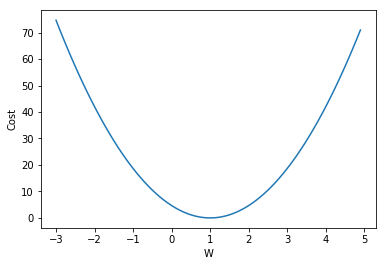

In [14]:
X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(X)

W = tf.placeholder(tf.float32)
h = tf.multiply(X,W)

cost = tf.reduce_sum(tf.pow(h - Y, 2))/(m)
init = tf.global_variables_initializer()

W_val = []
cost_val = []

sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    curr_cost, curr_w = sess.run([cost,W], feed_dict={W: i*0.1})
    W_val.append(i*0.1)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.ylabel('Cost')
plt.xlabel('W')

plt.show()

### minimized(Gradient descent)

In [15]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

W = tf.Variable(5.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

h = W * X

### Derivative 
$$
cost(W) = \frac{1}{2} \sum_{i=1}^{m} (W( x^i) - y^i)^2
$$

$$
cost(W) = \frac{1}{2m} \sum_{i=1}^{m} (W( x^i) - y^i)^2
$$

$$
Gradient descent algorithm
 W := W - a \frac{ \partial}{\partial{m}} cost(W)
$$

$$
W:= W - a \frac{1}{m} \sum_{i=1}^{m} (W( x^i) - y^i)x^i
$$

In [16]:
cost = tf.reduce_mean(tf.square(h - Y))
descent = W - tf.multiply(0.1, tf.reduce_mean(tf.multiply((tf.multiply(W,X) - Y), X)))
update = W.assign(descent)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step,sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))


0 21.2385 3.13333
1 6.04118 2.13778
2 1.71838 1.60681
3 0.488784 1.32363
4 0.139032 1.17261
5 0.0395468 1.09206
6 0.0112489 1.0491
7 0.00319967 1.02618
8 0.000910135 1.01397
9 0.000258876 1.00745
10 7.36358e-05 1.00397
11 2.09459e-05 1.00212
12 5.95745e-06 1.00113
13 1.69446e-06 1.0006
14 4.82022e-07 1.00032
15 1.37134e-07 1.00017
16 3.8992e-08 1.00009
17 1.11053e-08 1.00005
18 3.15166e-09 1.00003
19 8.92366e-10 1.00001
20 2.54924e-10 1.00001
21 7.31622e-11 1.0
22 2.14868e-11 1.0
23 6.63173e-12 1.0
24 1.80478e-12 1.0
25 5.16328e-13 1.0
26 2.65269e-13 1.0
27 9.9476e-14 1.0
28 0.0 1.0
29 0.0 1.0
30 0.0 1.0
31 0.0 1.0
32 0.0 1.0
33 0.0 1.0
34 0.0 1.0
35 0.0 1.0
36 0.0 1.0
37 0.0 1.0
38 0.0 1.0
39 0.0 1.0
40 0.0 1.0
41 0.0 1.0
42 0.0 1.0
43 0.0 1.0
44 0.0 1.0
45 0.0 1.0
46 0.0 1.0
47 0.0 1.0
48 0.0 1.0
49 0.0 1.0
50 0.0 1.0
51 0.0 1.0
52 0.0 1.0
53 0.0 1.0
54 0.0 1.0
55 0.0 1.0
56 0.0 1.0
57 0.0 1.0
58 0.0 1.0
59 0.0 1.0
60 0.0 1.0
61 0.0 1.0
62 0.0 1.0
63 0.0 1.0
64 0.0 1.0
65 0.0 1.0
66 

In [17]:
#compute_gradient and apply_gradient
"""
gradient = tf.reduce_mean((W*X-Y)*X)*2

cost = tf.reduce_mean(tf.square(h-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

gvs = optimizer.compute_gradients(cost)
apply_gradients = optimizer.apply_gradients(gvs)
"""

'\ngradient = tf.reduce_mean((W*X-Y)*X)*2\n\ncost = tf.reduce_mean(tf.square(h-Y))\n\noptimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)\n\ngvs = optimizer.compute_gradients(cost)\napply_gradients = optimizer.apply_gradients(gvs)\n'

## Multi variable Linear regression
$$
H(x_1,x_2) = w_1x_1 + w_2x_2 + w_3x_3
$$


In [18]:
x1_data = [73,93,89,96,73]
x2_data = [80,88,91,98,66]
x3_data = [75,93,90,100,70]
y_data = [152,185,180,196,142]

In [19]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight1')
W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight2')
W3 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight3')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0),name='bias')

h = W1 * x1 + W2 * x2 + W3*x3 + b

cost = tf.reduce_mean(tf.square(h - y))
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = opt.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2000):
    cost_val, h_val, _ = sess.run([cost, h, train] , feed_dict={x1:x1_data, x2: x2_data, x3:x3_data, y:y_data})
    if step % 20 == 0:
         print(step,cost_val, h_val)

0 652.899 [ 128.44477844  157.61582947  153.54672241  167.25895691  121.16895294]
20 0.240752 [ 151.1138916   184.86004639  180.39216614  196.49255371  141.94917297]
40 0.240442 [ 151.1153717   184.85945129  180.39283752  196.49285889  141.94847107]
60 0.240136 [ 151.11662292  184.85861206  180.39324951  196.4928894   141.94758606]
80 0.239834 [ 151.11787415  184.85777283  180.3936615   196.49293518  141.94671631]
100 0.239533 [ 151.11912537  184.85693359  180.39407349  196.49298096  141.94584656]
120 0.239238 [ 151.12036133  184.85610962  180.39448547  196.49302673  141.94497681]
140 0.238938 [ 151.12161255  184.85528564  180.39491272  196.49305725  141.94412231]
160 0.238639 [ 151.12284851  184.85447693  180.39530945  196.49308777  141.94326782]
180 0.238351 [ 151.12406921  184.8536377   180.39572144  196.49311829  141.94241333]
200 0.238063 [ 151.12528992  184.8528595   180.39613342  196.49316406  141.9415741 ]
220 0.237779 [ 151.12649536  184.85203552  180.39653015  196.49319458  1

In [20]:
x_data = [ [73,80,75], [93,88,93], [89,91,90],[96,98,100], [73,66,70]]
y_data = [[152],[185],[180],[196],[142]]


X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

h = tf.matmul(X,W)+b

cost = tf.reduce_mean(tf.square(h - y_data))
a = tf.Variable(0.1)
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = opt.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(3000):
    cost_val, h_val, _ =  sess.run([cost,h,train], feed_dict={X:x_data, Y: y_data}) 
    if step % 20 == 0:
        print(step, cost_val, h_val)

0 47784.9 [[-43.88097763]
 [-47.25308228]
 [-49.19365311]
 [-56.47864151]
 [-32.17952728]]
20 4.64529 [[ 150.08287048]
 [ 185.85191345]
 [ 180.50163269]
 [ 193.6534729 ]
 [ 145.61489868]]
40 4.61061 [[ 150.09777832]
 [ 185.84494019]
 [ 180.50762939]
 [ 193.65969849]
 [ 145.60360718]]
60 4.57627 [[ 150.11087036]
 [ 185.83587646]
 [ 180.51150513]
 [ 193.66365051]
 [ 145.59077454]]
80 4.54225 [[ 150.12385559]
 [ 185.82684326]
 [ 180.51530457]
 [ 193.6675415 ]
 [ 145.57795715]]
100 4.50864 [[ 150.13676453]
 [ 185.81787109]
 [ 180.51911926]
 [ 193.67141724]
 [ 145.56523132]]
120 4.47539 [[ 150.14961243]
 [ 185.80895996]
 [ 180.52290344]
 [ 193.67527771]
 [ 145.55258179]]
140 4.44244 [[ 150.16238403]
 [ 185.80007935]
 [ 180.52668762]
 [ 193.67913818]
 [ 145.53997803]]
160 4.40985 [[ 150.1750946 ]
 [ 185.79125977]
 [ 180.53042603]
 [ 193.68296814]
 [ 145.52745056]]
180 4.37761 [[ 150.18771362]
 [ 185.7824707 ]
 [ 180.53413391]
 [ 193.68678284]
 [ 145.51498413]]
200 4.34568 [[ 150.20028687]
 [

### Remove bias
$
\left[\begin{array}{ccc}
b&w_1&w_2&w_3  \end{array} \right]$
$
\left[\begin{array}{ddd}1\\x_1\\x_2\\x_3 \end{array} \right]$
=
$
\left[\begin{array}{eee} bx1+w_1 * x1+w_2 * x_2 + w_3 * x_3\end{array} \right]$
